In [22]:
def test_lineal (x , t) :
    return [
        -2 * x [ 0 ] - 3*x[1],
        1*x[1] ,
      ]

(x0)' = -2.000 x0 + -3.000 x1
(x1)' = 1.000 x1


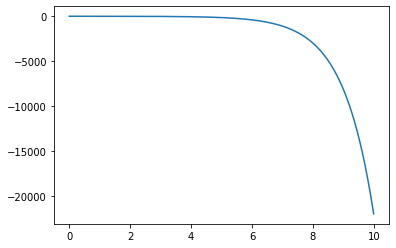

In [65]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Primero resuelvo el sistema numéricamente
dt = 0.002
t = np.arange(0,10,dt)
x0 = [ 0, 1]
X = odeint(test_lineal,x0,t)
plt.plot(t,X[:,0])

# Después lo extraigo con PySINDy
import pysindy as ps
model = ps.SINDy()
model.fit (X , t=dt )
model.print ()

In [144]:
def kayak1d(x , t) :
    f = 60.0; #N force
    d = 3.0; #Kg/m drag
    m = 90.0; # Kg mass
    w = 2.0*3.141592; # stroke freq
    
    return [
        (-d/m)*x[0]**2 + (f/m)*(1 - np.cos(2*w*x[1]))/2.0 ,
        1
        ]

 Iteration ... |y - Xw|^2 ...  a * |w|_2 ...      |w|_0 ... Total error: |y - Xw|^2 + a * |w|_2
         0 ... 2.7467e+03 ... 3.6223e+02 ...          7 ... 3.1090e+03
         1 ... 1.7707e+01 ... 3.6566e+02 ...          6 ... 3.8337e+02
         2 ... 8.6803e+00 ... 3.6650e+02 ...          6 ... 3.7518e+02
( x)' = 8.321 1 + -0.832  x^2 + -7.801 cos(2wt)
( t)' = 25.000 1


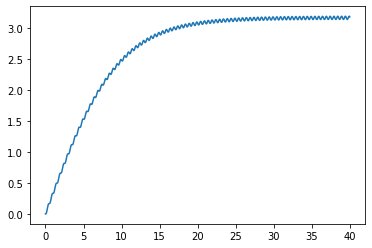

In [145]:
# Modules
import numpy as np
import pysindy as ps
import math as m
import matplotlib.pyplot as plt
from pysindy.feature_library import FourierLibrary, PolynomialLibrary, GeneralizedLibrary, CustomLibrary

# Parameters
f = 60.0; #N force
d = 3.0; #Kg/m drag
m = 90.0; # Kg mass
w = 2.0*3.141592; # stroke freq

# More parameters
n = 500; # Number of data

# Primero resuelvo el sistema numéricamente
dt = 0.05
t = np.arange(0,40,dt)
x0 = [ 0, 0]
X1 = odeint(kayak1d,x0,t)
plt.plot(t,X1[:,0])

# Después lo extraigo con PySINDy
# PySINDy options
x1 = np.array([[0.],[1.]])
functions = [lambda t : np.sin(w*t), lambda t : np.sin(2*w*t), lambda t : np.cos(w*t),  lambda t : np.cos(2*w*t)]
fun_names = [lambda t: 'sin(wt)', lambda t: 'sin(2wt)',  lambda t: 'cos(wt)', lambda t: 'cos(2wt)']

lib_custom = CustomLibrary(library_functions=functions, function_names=fun_names)
lib_poly = PolynomialLibrary(degree=2,include_bias=True)
lib_fourier = FourierLibrary(n_frequencies=1)
lib_generalized = lib_poly + lib_custom;

#lib_generalized.transform(x1)
#lib_generalized.fit(x1)
#lib_generalized.get_feature_names()

differentiation_method = ps.FiniteDifference(order=2)
#optimizer = ps.SR3(threshold=0.1,nu=1,tol=1e-6)
optimizer = ps.STLSQ(threshold=.1, alpha=.5, verbose = True)

model1 = ps.SINDy(
    differentiation_method=differentiation_method ,
    feature_library=lib_generalized ,
    optimizer=optimizer ,
    feature_names=[ " x" , " t"]
)



#model1 = ps.SINDy()
model1.fit(X1 , 0.002 )
model1.print()
# Hay que optimizar el solver y mucho